In [1]:
%load_ext autoreload
%autoreload 2

import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



import flotilla

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'
! mkdir $folder

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2015-12-02 15:56:53	Reading datapackage from /home/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2015-12-02 15:56:53	Parsing datapackage to create a Study object
2015-12-02 15:57:37	Initializing Study
2015-12-02 15:57:37	Initializing Predictor configuration manager for Study
2015-12-02 15:57:37	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-12-02 15:57:37	Added ExtraTreesClassifier to default predictors
2015-12-02 15:57:37	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-12-02 15:57:37	Added ExtraTreesRegressor to default predictors
2015-12-02 15:57:37	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-12-02 15:57:37	Added GradientBoostingClassifier to default predictors
2015-12-02 15:57:37	Predictor GradientBoostingRegressor is of type <class 'skle

In [2]:
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]
print splicing_singles_no_outliers.shape

(181, 11767)


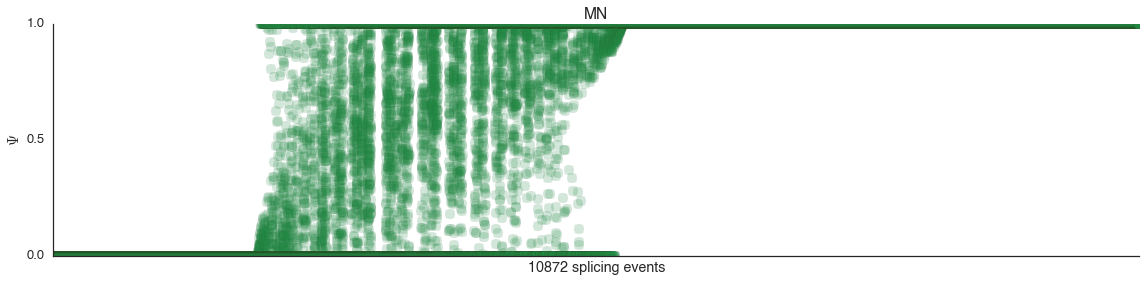

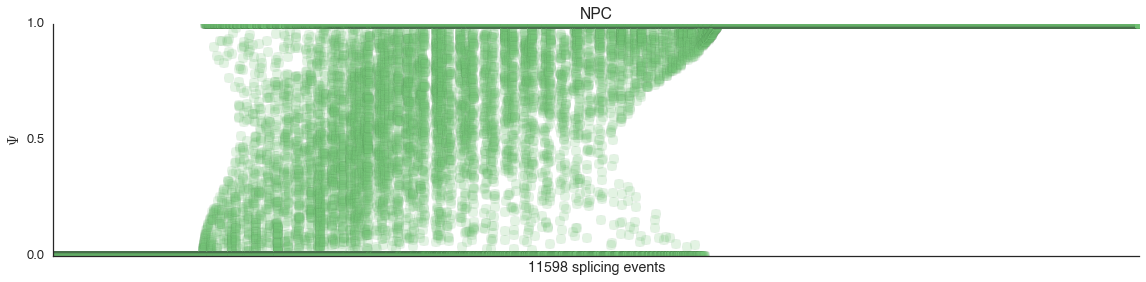

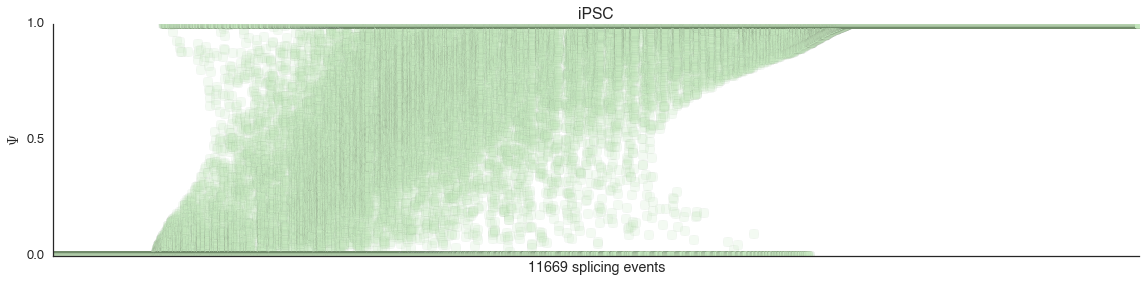

In [3]:
for phenotype, data in splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype):

    flotilla.visualize.splicing.lavalamp(data, color=study.phenotype_to_color[phenotype], title=phenotype)

    fig = plt.gcf()
    fig.tight_layout()
    fig.savefig('{}/lavalamp_{}.png'.format(folder, phenotype))

## Estimate modalities

### Initialize the modality estimator

In [4]:
import anchor

bayesian = anchor.BayesianModalities()
# binned = anchor.BinnedModalities()
# monte_carlo = anchor.MonteCarloModalities()

In [5]:
# fig = estimator.violinplot(n=1e6)
# for ax in fig.axes:
#     ax.set(yticks=[0, 0.5, 1], xlabel='')
# fig.tight_layout()
# sns.despine()
# fig.savefig('{}/modality_estimator_parameterized_family.pdf'.format(folder))

## Calculate/Estimate modalities only on single cells, with no outliers

And at least 20 cells per splicing event, per celltype/phenotype

In [6]:
print splicing_singles_no_outliers.shape
splicing_singles_no_outliers = splicing_singles_no_outliers.groupby(
    study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=20, axis=1))
print splicing_singles_no_outliers.shape

(181, 11767)
(181, 8125)


In [7]:
pkm_events = study.splicing.maybe_renamed_to_feature_id('PKM')

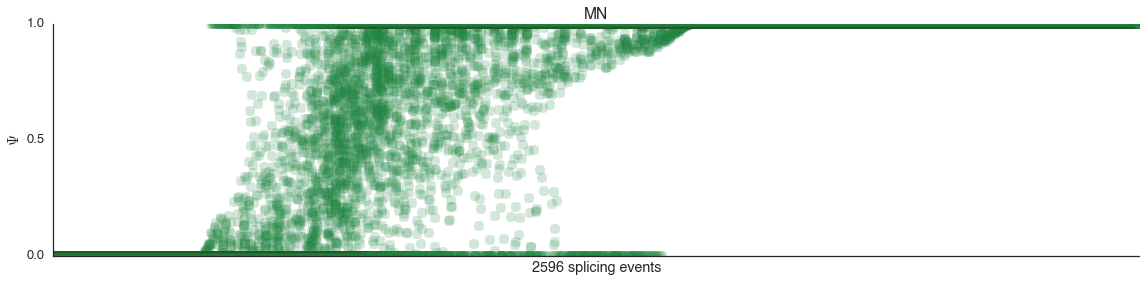

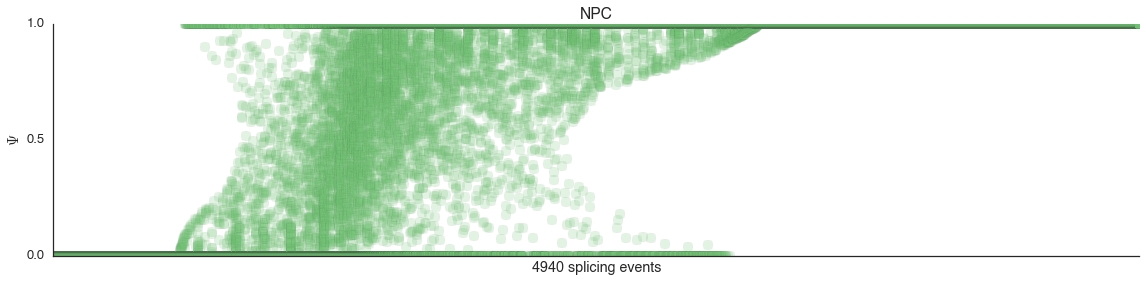

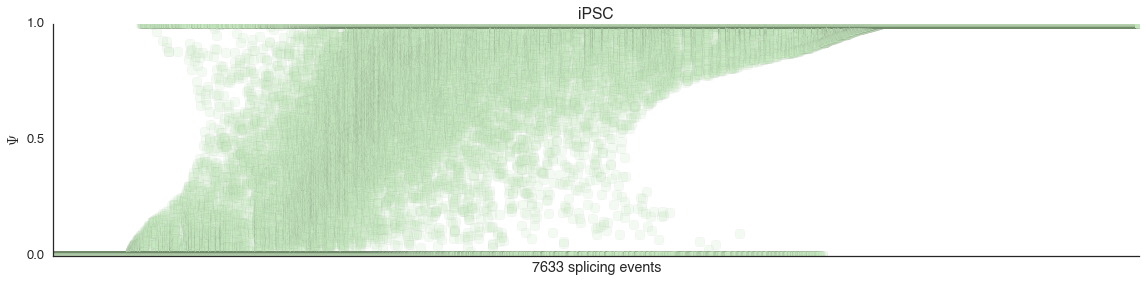

In [8]:
for phenotype, data in splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype):

    flotilla.visualize.splicing.lavalamp(data, color=study.phenotype_to_color[phenotype], title=phenotype)

    fig = plt.gcf()
    fig.tight_layout()
    fig.savefig('{}/lavalamp_{}_20cells.png'.format(folder, phenotype))

In [14]:
%time modality_fits = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype).apply(bayesian.fit)

CPU times: user 17min 54s, sys: 859 ms, total: 17min 54s
Wall time: 17min 56s


In [15]:
modality_fits

exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-  \
phenotype                                                                                                                  
MN        bimodal                                         -4.440892e-16                                                    
          middle                                          -4.440892e-16                                                    
          multimodal                                       1.000000e+01                                                    
          ~0                                              -4.440892e-16                                                    
          ~1                                              -4.440892e-16                                                    
NPC       bimodal                                         -4.440892e-16                                                    
          middle                                          -4.440892e-16                                                    
          multimodal                                       1.000000e+01                                                    
          ~0                                              -4.440892e-16                                                    
          ~1                                              -4.440892e-16                                                    
iPSC      bimodal                                                   NaN                                                    
          middle                                                    NaN                                                    
          multimodal                                                NaN                                                    
          ~0                                              -1.763733e+02                                                    
          ~1                                               4.605665e+01                                                    

                      exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-  \
phenotype                                                                                                                  
MN        bimodal                                         -4.440892e-16                                                    
          middle                                          -4.440892e-16                                                    
          multimodal                                       1.000000e+01                                                    
          ~0                                              -4.440892e-16                                                    
          ~1                                              -4.440892e-16                                                    
NPC       bimodal                                         -4.440892e-16                                                    
          middle                                          -4.440892e-16                                                    
          multimodal                                       1.000000e+01                                                    
          ~0                                              -4.440892e-16                                                    
          ~1                                              -4.440892e-16                                                    
iPSC      bimodal                                                   NaN                                                    
          middle                                                    NaN                                                    
          multimodal                                                NaN                                                    
          ~0                                         

In [23]:
splicing_subset = splicing_singles_no_outliers.iloc[:, :10]

In [24]:
bayesian = anchor.BayesianModalities()

In [27]:
splicing_subset.groupby(study.sample_id_to_phenotype).apply(bayesian.fit_predict)

,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003529:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020785:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283497-102283686:-
phenotype,,,,,,,,,,
MN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,~1,~1
NPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,~1,~1
iPSC,~1,~1,bimodal,~1,~1,bimodal,bimodal,bimodal,~1,~1


In [9]:
%time modality_assignments = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype).apply(bayesian.fit_predict)

CPU times: user 18min 9s, sys: 385 ms, total: 18min 10s
Wall time: 18min 11s


In [17]:
modality_assignments

,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003529:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020785:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283497-102283686:-,...,exon:chrY:15024920-15024974:+@exon:chrY:15025630-15025765:+@exon:chrY:15026476-15026561:+,exon:chrY:15026476-15026561:+@exon:chrY:15026796-15026894:+@exon:chrY:15026979-15027139:+,exon:chrY:15027542-15027686:+@exon:chrY:15027795-15027939:+@exon:chrY:15028173-15028354:+,exon:chrY:15028429-15028546:+@exon:chrY:15028819-15028972:+@exon:chrY:15029315-15029454:+,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722771-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2735309:+
phenotype,,,,,,,,,,,,,,,,,,,,,
MN,multimodal,multimodal,multimodal,multimodal,multimodal,multimodal,multimodal,multimodal,~1,~1,...,multimodal,multimodal,multimodal,multimodal,multimodal,~1,~1,~1,~1,~1
NPC,multimodal,multimodal,multimodal,multimodal,multimodal,multimodal,multimodal,multimodal,~1,~1,...,multimodal,multimodal,multimodal,multimodal,~1,~1,~1,~1,~1,~1
iPSC,~1,~1,bimodal,~1,~1,bimodal,bimodal,bimodal,~1,~1,...,~1,~1,~1,~1,~1,~1,~1,~1,~1,~1


In [18]:
modality_assignments[splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype).count() < 20] = np.nan
modality_assignments

,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003529:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020785:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283497-102283686:-,...,exon:chrY:15024920-15024974:+@exon:chrY:15025630-15025765:+@exon:chrY:15026476-15026561:+,exon:chrY:15026476-15026561:+@exon:chrY:15026796-15026894:+@exon:chrY:15026979-15027139:+,exon:chrY:15027542-15027686:+@exon:chrY:15027795-15027939:+@exon:chrY:15028173-15028354:+,exon:chrY:15028429-15028546:+@exon:chrY:15028819-15028972:+@exon:chrY:15029315-15029454:+,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722771-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2735309:+
phenotype,,,,,,,,,,,,,,,,,,,,,
MN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,~1,~1,...,NaN,NaN,NaN,NaN,NaN,~1,~1,~1,~1,~1
NPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,~1,~1,...,NaN,NaN,NaN,NaN,~1,~1,~1,~1,~1,~1
iPSC,~1,~1,bimodal,~1,~1,bimodal,bimodal,bimodal,~1,~1,...,~1,~1,~1,~1,~1,~1,~1,~1,~1,~1


In [19]:
modalities_tidy = modality_assignments.stack().reset_index()
modalities_tidy = modalities_tidy.rename(columns={'level_1': 'event_name', 0: "modality",})
modalities_tidy.head()

,phenotype,event_name,modality
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,~1
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,~1
2,MN,exon:chr10:103348089-103348157:+@exon:chr10:10...,~1
3,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal
4,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal


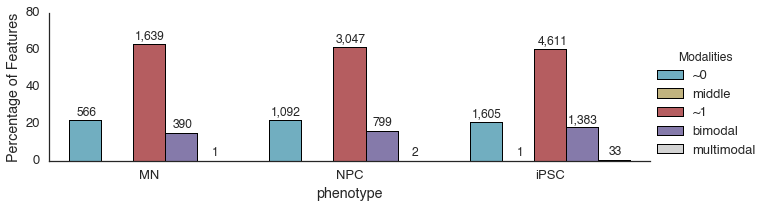

In [20]:
g = anchor.barplot(modalities_tidy, x='phenotype', hue='modality')
g.savefig('{}/modalities_barplot.pdf'.format(folder))

In [21]:
study.supplemental.modalities_tidy = modalities_tidy

In [28]:
modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality  
MN         bimodal        390
           multimodal       1
           ~0             566
           ~1            1639
NPC        bimodal        799
           multimodal       2
           ~0            1092
           ~1            3047
iPSC       bimodal       1383
           middle           1
           multimodal      33
           ~0            1605
           ~1            4611
dtype: int64

In [30]:
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study.save('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
